# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')
df.head(n=5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [10]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [11]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

In [15]:
# total records : 1715
df.shape

(1715, 25)

In [18]:
# number of records missing 8TH GRADE AVG MATH SCORE: 1113
# 65% records are missing key variable
df.AVG_MATH_8_SCORE.isnull().sum()

1113

In [14]:
# get a list of unique states in df
#random values like 'DODEA' and 'NATIONAL'.. if I had more time I'd look into what these values mean from kaggle
#but i'll just drop them for this analysis
df.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

In [36]:
# dropping records with STATE is either 'DODEA' or 'NATIONAL'
df = df[~df.STATE.isin(['DODEA','NATIONAL'])]

In [37]:
# looking at records missing 8TH GRADE AVG MATH SCORE to see if there's a particular state missing data
# looks like all states are missing similar number of records
df[df.AVG_MATH_8_SCORE.isnull()][['STATE','AVG_MATH_8_SCORE']].groupby('STATE').size()

STATE
ALABAMA                 21
ALASKA                  24
ARIZONA                 21
ARKANSAS                21
CALIFORNIA              21
COLORADO                22
CONNECTICUT             21
DELAWARE                22
DISTRICT_OF_COLUMBIA    21
FLORIDA                 22
GEORGIA                 21
HAWAII                  21
IDAHO                   21
ILLINOIS                22
INDIANA                 21
IOWA                    22
KANSAS                  23
KENTUCKY                21
LOUISIANA               21
MAINE                   22
MARYLAND                21
MASSACHUSETTS           22
MICHIGAN                21
MINNESOTA               21
MISSISSIPPI             22
MISSOURI                22
MONTANA                 22
NEBRASKA                21
NEVADA                  23
NEW_HAMPSHIRE           22
NEW_JERSEY              22
NEW_MEXICO              21
NEW_YORK                21
NORTH_CAROLINA          21
NORTH_DAKOTA            21
OHIO                    21
OKLAHOMA              

In [50]:
# 51 unique states in dataset
df.STATE.unique().shape

(51,)

In [51]:
# look at year
# ok so seems like there are a lot of years with missing data for all states in dataset
# year 1992 is missing 9 records
df[df.AVG_MATH_8_SCORE.isnull()][['YEAR','AVG_MATH_8_SCORE']].groupby('YEAR').size()

YEAR
1986    51
1987    51
1988    51
1989    51
1990    13
1991    51
1992     9
1993    51
1994    51
1995    51
1996    51
1997    51
1998    51
1999    51
2000    11
2001    51
2002    51
2004    51
2006    51
2008    51
2010    51
2012    51
2014    51
2016    51
dtype: int64

In [45]:
#24 years missing data on AVG MATH 8 SCORE
df[df.AVG_MATH_8_SCORE.isnull()]['YEAR'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2004, 2006, 2008, 2010, 2012, 2014, 2016, 1986, 1987, 1988, 1989,
       1991, 1990])

How many years of data are logged in our dataset? 

**There are 33 years in dataset but only 9 years with complete data for the variable we're interested in for all states**

In [53]:
# removing all years with no data for AVG MATH 8 SCORE
df = df[~df.YEAR.isin(df[df.AVG_MATH_8_SCORE.isnull()]['YEAR'].unique())]
df[df.AVG_MATH_8_SCORE.isnull()][['YEAR','AVG_MATH_8_SCORE']].groupby('YEAR').size()

Series([], dtype: int64)

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

**Ohio has higher average 8th grade math score**

In [57]:
mi_mean_math_score = np.mean(df[df.STATE == 'MICHIGAN']['AVG_MATH_8_SCORE'])
oh_mean_math_score = np.mean(df[df.STATE == 'OHIO']['AVG_MATH_8_SCORE'])

mi_mean_math_score > oh_mean_math_score

False

Find the average for your outcome score across all states in 2019

In [63]:
np.mean(df[df.YEAR==2019].AVG_MATH_8_SCORE)

281.03921568627453

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [67]:
df[['STATE','AVG_MATH_8_SCORE']].groupby('STATE').max('AVG_MATH_8_SCORE').reset_index()

,STATE,AVG_MATH_8_SCORE
0,ALABAMA,269.0
1,ALASKA,283.0
2,ARIZONA,283.0
3,ARKANSAS,279.0
4,CALIFORNIA,277.0
5,COLORADO,292.0
6,CONNECTICUT,289.0
7,DELAWARE,284.0
8,DISTRICT_OF_COLUMBIA,269.0
9,FLORIDA,281.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [68]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [73]:
df.TOTAL_EXPENDITURE.isnull().sum()

102

In [71]:
df.TOTAL_REVENUE.isnull().sum()

102

In [70]:
df.ENROLL_ALL_EST.isnull().sum()

102

In [74]:
df[df.TOTAL_EXPENDITURE.isnull()][['YEAR','TOTAL_EXPENDITURE']].groupby('YEAR').size()

YEAR
2017    51
2019    51
dtype: int64

In [75]:
df[df.TOTAL_REVENUE.isnull()][['YEAR','TOTAL_REVENUE']].groupby('YEAR').size()

YEAR
2017    51
2019    51
dtype: int64

In [78]:
# 2017 and 2019 are both missing total expenditure and total revenue for all states
# removing these years

df = df[~df.YEAR.isin(df[df.TOTAL_EXPENDITURE.isnull()]['YEAR'].unique())]
df.YEAR.unique()

array([2003, 2005, 2007, 2009, 2011, 2013, 2015])

In [79]:
# years remaining in dataset are 2003, 2005, 2007, 2009, 2011, 2013, and 2015

In [100]:
# b/c each state has different number of population or students.. 
# i wanna see the revenue and expenditure spent per student
# i also wanna measure the pct of expenditure spent on instruction across states

df['REVENUE_PER_STUDENT'] = df.TOTAL_REVENUE / df.ENROLL_ALL_EST
df['EXPENDITURE_PER_STUDENT'] = df.TOTAL_EXPENDITURE / df.ENROLL_ALL_EST
df['INSTRUCTION_EXPENDITURE_PCT'] = df.INSTRUCTION_EXPENDITURE / df.TOTAL_EXPENDITURE
df['PROFIT_PER_STUDENT'] = df.REVENUE_PER_STUDENT / df.EXPENDITURE_PER_STUDENT

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

In [82]:
df.head(n=5)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,7.138417,7.279753,0.531638
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,10.697044,12.079916,0.474154
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,7.461789,7.096571,0.452621
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,7.200305,7.203691,0.545428
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,9.606578,9.595983,0.494755


In [84]:
np.mean(df.REVENUE_PER_STUDENT)

12.112201702763048

In [85]:
np.mean(df.EXPENDITURE_PER_STUDENT)

12.135434067695297

In [87]:
np.mean(df.INSTRUCTION_EXPENDITURE_PCT)

0.5147038892331369

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [91]:
import seaborn as sns

In [94]:
df.YEAR.unique()

array([2003, 2005, 2007, 2009, 2011, 2013, 2015])

<AxesSubplot:xlabel='REVENUE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

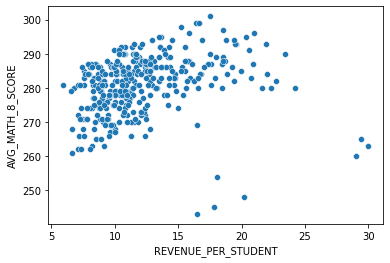

In [99]:
sns.scatterplot(data=df, x="REVENUE_PER_STUDENT", y="AVG_MATH_8_SCORE")

<AxesSubplot:xlabel='EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

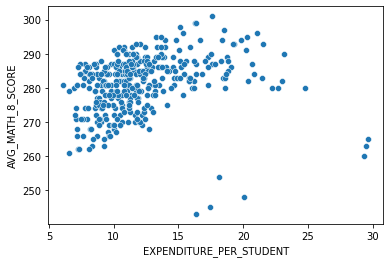

In [105]:
sns.scatterplot(data = df, x= 'EXPENDITURE_PER_STUDENT', y = 'AVG_MATH_8_SCORE')

In [107]:
df[(df.REVENUE_PER_STUDENT > 15) & (df.AVG_MATH_8_SCORE < 260)]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT,PROFIT_PER_STUDENT
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,16828.0,78057.0,205.0,243.0,188.0,239.0,16.499230,16.379299,0.428056,1.007322
671,2005_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2005,62306.0,1109605.0,167922.0,0.0,941683.0,1085658.0,459063.0,...,18769.0,76876.0,211.0,245.0,191.0,238.0,17.808959,17.424614,0.422843,1.022058
773,2007_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2007,56943.0,1148358.0,134700.0,0.0,1013658.0,1140506.0,491992.0,...,20242.0,78422.0,214.0,248.0,197.0,241.0,20.166798,20.028906,0.431380,1.006885
875,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,17597.0,69433.0,219.0,254.0,202.0,242.0,18.068801,18.167016,0.410620,0.994594


In [108]:
df[(df.REVENUE_PER_STUDENT > 25) & (df.AVG_MATH_8_SCORE < 270)]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT,PROFIT_PER_STUDENT
977,2011_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2011,44199.0,1283071.0,155505.0,0.0,1127566.0,1297175.0,525185.0,...,17261.0,73911.0,222.0,260.0,201.0,242.0,29.029412,29.348515,0.404868,0.989127
1079,2013_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2013,44179.0,1300036.0,129874.0,0.0,1170162.0,1308438.0,559940.0,...,17717.0,78153.0,229.0,265.0,206.0,248.0,29.426560,29.616741,0.427945,0.993579
1181,2015_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2015,46155.0,1382282.0,146366.0,0.0,1235916.0,1360942.0,557345.0,...,18884.0,84024.0,231.0,263.0,212.0,248.0,29.948695,29.486340,0.409529,1.015680


In [109]:
df[(df.EXPENDITURE_PER_STUDENT > 15) & (df.AVG_MATH_8_SCORE < 260)]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT,PROFIT_PER_STUDENT
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,16828.0,78057.0,205.0,243.0,188.0,239.0,16.499230,16.379299,0.428056,1.007322
671,2005_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2005,62306.0,1109605.0,167922.0,0.0,941683.0,1085658.0,459063.0,...,18769.0,76876.0,211.0,245.0,191.0,238.0,17.808959,17.424614,0.422843,1.022058
773,2007_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2007,56943.0,1148358.0,134700.0,0.0,1013658.0,1140506.0,491992.0,...,20242.0,78422.0,214.0,248.0,197.0,241.0,20.166798,20.028906,0.431380,1.006885
875,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,17597.0,69433.0,219.0,254.0,202.0,242.0,18.068801,18.167016,0.410620,0.994594


In [110]:
df[(df.EXPENDITURE_PER_STUDENT > 25) & (df.AVG_MATH_8_SCORE < 270)]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT,PROFIT_PER_STUDENT
977,2011_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2011,44199.0,1283071.0,155505.0,0.0,1127566.0,1297175.0,525185.0,...,17261.0,73911.0,222.0,260.0,201.0,242.0,29.029412,29.348515,0.404868,0.989127
1079,2013_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2013,44179.0,1300036.0,129874.0,0.0,1170162.0,1308438.0,559940.0,...,17717.0,78153.0,229.0,265.0,206.0,248.0,29.426560,29.616741,0.427945,0.993579
1181,2015_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2015,46155.0,1382282.0,146366.0,0.0,1235916.0,1360942.0,557345.0,...,18884.0,84024.0,231.0,263.0,212.0,248.0,29.948695,29.486340,0.409529,1.015680


Most of these data points are clustered closely together. The 2 charts show there are 2 clusters of outliers. Looking at the date more closely, these 2 clusters are all from "District of Columbia" throughout the years. The state was able to increase revenue per student over the years but the scores didn't change much. Actually, from 2011-2015 the state had the highest revenue per student but the score is still low compared to many other states. The same analysis goes for expenditure

<AxesSubplot:xlabel='PROFIT_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

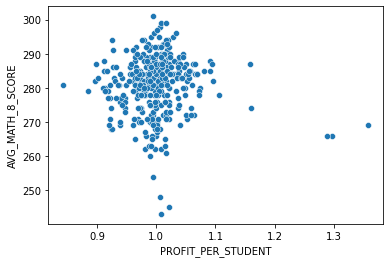

In [101]:
sns.scatterplot(data=df, x="PROFIT_PER_STUDENT", y="AVG_MATH_8_SCORE")

In [111]:
df[df.PROFIT_PER_STUDENT > 1.1]

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,REVENUE_PER_STUDENT,EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PCT,PROFIT_PER_STUDENT
572,2003_HAWAII,HAWAII,2003,183829.0,2078877.0,170377.0,1873318.0,35182.0,1602392.0,888473.0,...,53519.0,183609.0,227.0,266.0,208.0,251.0,11.308754,8.716753,0.554467,1.297359
674,2005_HAWAII,HAWAII,2005,183185.0,2274166.0,236973.0,1986615.0,50578.0,1765805.0,1007207.0,...,55258.0,182818.0,230.0,266.0,210.0,249.0,12.414586,9.639463,0.570395,1.287892
776,2007_HAWAII,HAWAII,2007,180728.0,2985593.0,256696.0,2681049.0,47848.0,2199604.0,1177781.0,...,54246.0,179897.0,234.0,269.0,213.0,251.0,16.519814,12.170798,0.535451,1.357332
878,2009_HAWAII,HAWAII,2009,179478.0,2689758.0,392837.0,2205032.0,91889.0,2318671.0,1402305.0,...,52630.0,180196.0,236.0,274.0,211.0,255.0,14.986561,12.918971,0.604788,1.160043
881,2009_INDIANA,INDIANA,2009,1028259.0,12999357.0,1403839.0,5804809.0,5790709.0,11218398.0,5548292.0,...,316062.0,1046661.0,243.0,287.0,223.0,266.0,12.642104,10.910090,0.494571,1.158753
980,2011_HAWAII,HAWAII,2011,179601.0,2499513.0,347363.0,2088870.0,63280.0,2259104.0,1253534.0,...,51598.0,182706.0,239.0,278.0,214.0,257.0,13.917033,12.578460,0.554881,1.106418


This chart shows the revenue to expenditure ratio per student in the dataset. Most data points range from 0.9 to 1.1. Hawaii interestingly is the most "profitable" state with the highest revenue to expenditure ratio, but the average 8th grade math score seems low compared to the rest of the data.

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PCT', ylabel='AVG_MATH_8_SCORE'>

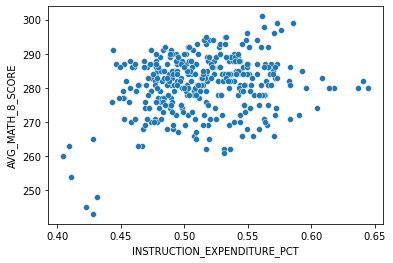

In [112]:
sns.scatterplot(data = df, x = 'INSTRUCTION_EXPENDITURE_PCT', y = 'AVG_MATH_8_SCORE')

In [115]:
df[['INSTRUCTION_EXPENDITURE_PCT','AVG_MATH_8_SCORE']].corr()

,INSTRUCTION_EXPENDITURE_PCT,AVG_MATH_8_SCORE
INSTRUCTION_EXPENDITURE_PCT,1.000000,0.228234
AVG_MATH_8_SCORE,0.228234,1.000000


This plots shows there seems to be a slight positive correlation between the percentage of expenditure that goes toward instruction vs. the average 8th grade math score (0.22)

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [116]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'REVENUE_PER_STUDENT',
       'EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PCT',
       'PROFIT_PER_STUDENT'],
      dtype='object')

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df[['ENROLL_8', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 
       'REVENUE_PER_STUDENT', 'EXPENDITURE_PER_STUDENT', 
       'INSTRUCTION_EXPENDITURE_PCT', 'PROFIT_PER_STUDENT']]
y = df.AVG_MATH_8_SCORE

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [122]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [123]:
# create your model here
model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
np.mean(df.AVG_MATH_8_SCORE)

280.96918767507003

In [125]:
print(model.intercept_)
print(model.coef_)

261.14640824486065
[-4.75322402e-05  1.98575078e-06 -1.64815670e-06 -1.65043702e+00
  1.82370735e+00  6.86760192e+01 -1.79015127e+01]


This set of coefficients indicates that the last 4 variables (revenue per student, expenditure per student, instruction expenditure percentage, and profit per student) have some effect on the average 8th grade math score

Revenue per student has a negative impact. The higher the revenue generated from each student, the lower the score. This could make sense.

Expenditure per student and instruction expenditure percentage have a positive impact. The more money is spent on a student and the more percentage of expense goes towards instruction, students show a higher score. This also makes sense.

The higher the revenue per expense ratio per student, the lower the score. THis also makes sense.

In [134]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [135]:
r_2 = model.score(X_test, y_test)
r_2

-0.0731428701262371

In [138]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.2984826515755254

In [148]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

6.408476997491972

In [136]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

8.329416749032555

In [137]:
np.std(df.AVG_MATH_8_SCORE)

8.465229768080883

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

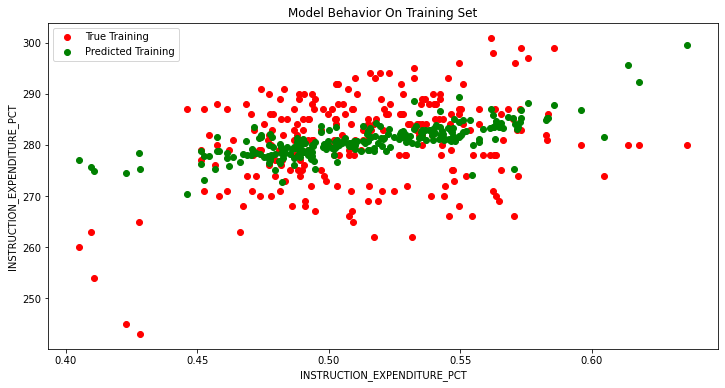

In [159]:
col_name = 'INSTRUCTION_EXPENDITURE_PCT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION_EXPENDITURE_PCT')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

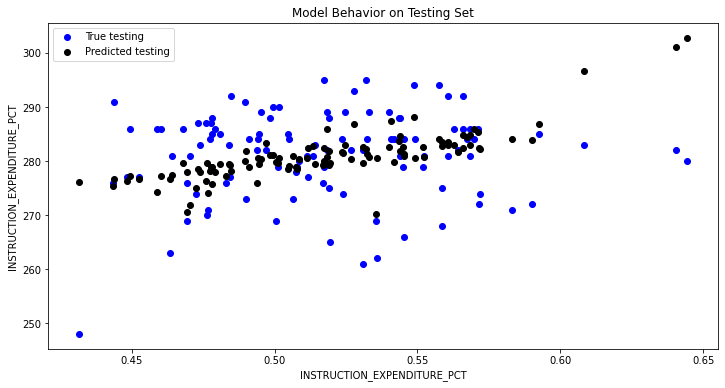

In [160]:
col_name = 'INSTRUCTION_EXPENDITURE_PCT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION_EXPENDITURE_PCT')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In [158]:
# establishing baseline for MAE
np.mean(np.abs([np.mean(y_train)] * X_test.shape[0]-y_test))

6.202625316079137

The average of the absolute of residuals from linear regression model (mean absolute error) is calculated to be 6.4, but the standard deviation of the residuals (root mean squared error) is calculated to be 8.32. If I took the average of average 8th grade math score of the training dataset and use that value to predict the score for every data point in the testing set, I'd have a lower MAE than our linear regression model. This means our model isn't great, which is also confirmed by a low R_2 score.

Based on the graphs, we do see the predicted data points are clustered together. 